# Preprocessing pipeline developed to enhance the cells

In [1]:
    import cv2
    import matplotlib.pyplot as plt
    import numpy as np
    %matplotlib inline

In [2]:
# load the image
img = cv2.imread("../data/raw/DS_COMB_PT/BEE_HOPE ZAVIAL 2016_09_20 BL1_Z DSC_3858.JPG")

In [3]:
def convert_bgr_to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

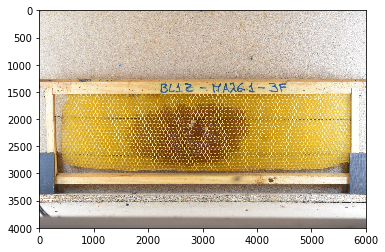

In [4]:
"""
Showing image loaded. OpenCV loads the channels as BGR so it is necessary to convert into RGB before 
plotting using matplotlib.
"""
plt.imshow(convert_bgr_to_rgb(img))
plt.show()

### Different types of conversion to grayscale

Text(0.5,1,'Red Channel')

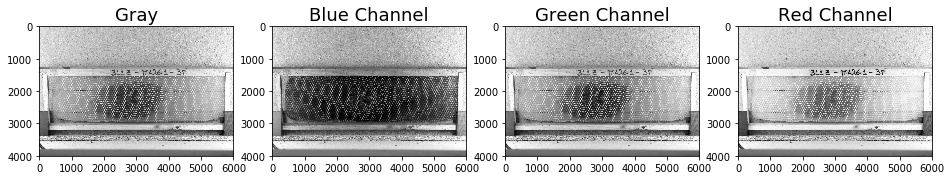

In [42]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
b, g, r = cv2.split(img)

f, axarr = plt.subplots(1,4,  figsize=(16,24))

axarr[0].imshow(gray, cmap="gray")
axarr[0].set_title('Gray', fontsize=18)
axarr[1].imshow(b, cmap="gray")
axarr[1].set_title('Blue Channel', fontsize=18)
axarr[2].imshow(g, cmap="gray")
axarr[2].set_title('Green Channel', fontsize=18)
axarr[3].imshow(r, cmap="gray")
axarr[3].set_title('Red Channel', fontsize=18)

### Contrast Limited Adaptive Histogram Equalization (CLAHE)

Increases the contrast over the image, but working with small areas each time.

Text(0.5,1,'CLAHE')

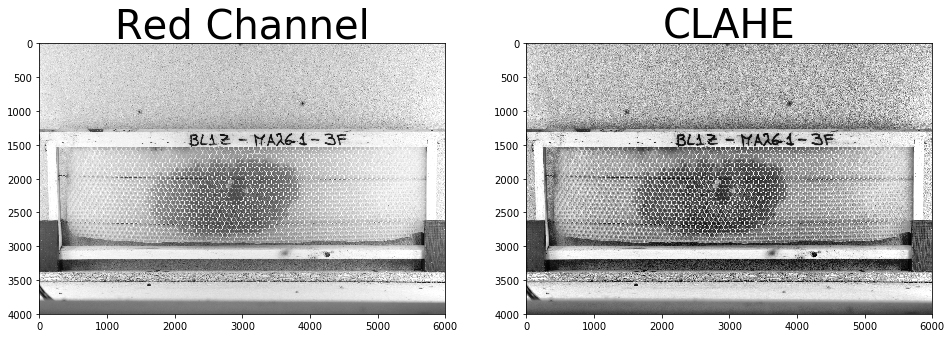

In [39]:
#Based on some empirical tests we will work only with the Red channel. Feel free to try other channels mixtures
red_channel = r
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(9,9))
red_channel_clahe = clahe.apply(red_channel)

f, axarr = plt.subplots(1,2,  figsize=(16,24))

axarr[0].imshow(red_channel, cmap="gray")
axarr[0].set_title('Red Channel', fontsize=40)
axarr[1].imshow(red_channel_clahe, cmap="gray")
axarr[1].set_title('CLAHE', fontsize=40)


### Bilateral filter
Bilateral filter applied to remove noise in the image without bluring the edges. We also show other two filters capable of remove noise, but with the drawback of bluring edges.

Text(0.5,1,'Gaussian Filter')

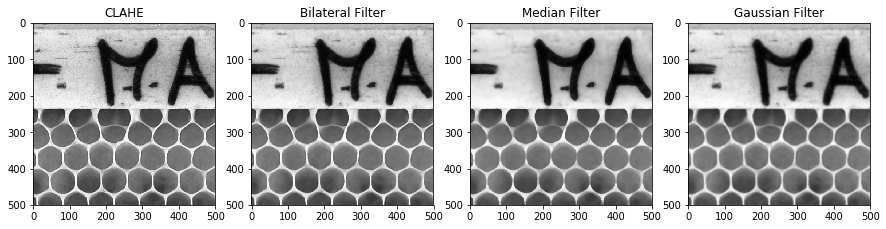

In [48]:
red_channel_clahe_billateral = cv2.bilateralFilter(src=red_channel_clahe, d=5, sigmaColor=50, sigmaSpace=50)
median = cv2.medianBlur(red_channel_clahe, ksize=9)
gaussian = cv2.GaussianBlur(red_channel_clahe, (9,9),0)

f, axarr = plt.subplots(1,4,  figsize=(15,15))
axarr[0].imshow(red_channel_clahe[1300:1800, 3000:3500], cmap="gray")
axarr[0].set_title('CLAHE', fontsize=12)
axarr[1].imshow(red_channel_clahe_billateral[1300:1800, 3000:3500], cmap="gray")
axarr[1].set_title('Bilateral Filter', fontsize=12)
axarr[2].imshow(median[1300:1800, 3000:3500], cmap="gray")
axarr[2].set_title('Median Filter', fontsize=12)
axarr[3].imshow(gaussian[1300:1800, 3000:3500], cmap="gray")
axarr[3].set_title('Gaussian Filter', fontsize=12)

In [50]:
type(b)

numpy.ndarray